# Exploring Harmonic Balance

In this notebook, I'll have a look at this library to see how it can be useful for us:

https://github.com/NonlinearOscillations/HarmonicBalance.jl


There is a lot of precompile time on installation...been running for about 10 minutes after I used `Pkg()` to install it. I will have to be patient. 

In [2]:
using HarmonicBalance

## Start with example from website

From the Readme :)

In [3]:
@variables α, ω, ω0, F, t, η, x(t) # declare constant variables and a function x(t)
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + α*x^3 + η*d(x,t)*x^2 ~ F*cos(ω*t), x)
add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)

# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

fixed = (α => 1., ω0 => 1.0, F => 0.01, η=>0.1)   # fixed parameters
varied = ω => LinRange(0.9, 1.2, 100)           # range of parameter values
result = get_steady_states(harmonic_eq, varied, fixed)

Tracking 9 paths... 100%|███████████████████████████████| Time: 0:00:09
  # paths tracked:                  9
  # non-singular solutions (real):  3 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         3 (0)


A steady state result for 100 parameter points

Solution branches:   3
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


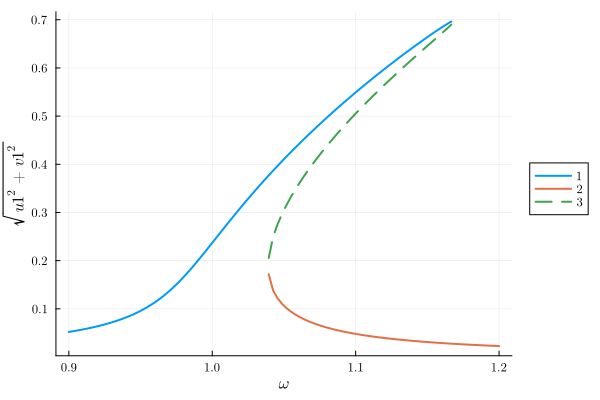

In [4]:
plot(result, "sqrt(u1^2 + v1^2)")

OK, cool, that seems to work. Let's see if we can reproduce some of our stuff with idler resonances. 

## Idler resonance: Add a second driving term

And switch the swept driving term to a weak-probe limit. 

In [8]:
@variables α, ω, ω0, ω1, F, F2, t, η,  x(t) # declare constant variables and a function x(t)
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + α*x^3 + η*d(x,t)*x^2 ~ F*cos(ω*t) - F2*cos(1.1*ω1*t), x)
add_harmonic!(diff_eq, x, ω) # specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)

# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

fixed = (α => 1., ω0 => 1.0, F => 0.0001, F2 => 0.01, η=>0.1, ω1 => 1.1 )   # fixed parameters
varied = ω => LinRange(0.9, 1.2, 100)           # range of parameter values
result = get_steady_states(harmonic_eq, varied, fixed)

A steady state result for 100 parameter points

Solution branches:   3
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


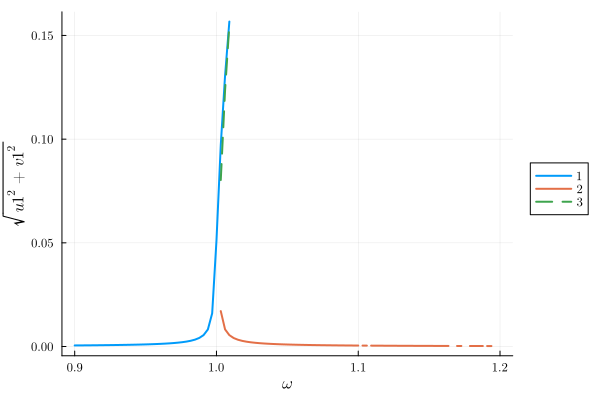

In [9]:
plot(result, "sqrt(u1^2 + v1^2)")

OK, this ran, but I think I am probably not plotting the right thing. Let's try to figure out what the function returns. 

OK, I'm not enough of a Julia expert to figure out what is inside `result`. I'll go a bit further looking 

In [12]:
dir(result)

LoadError: UndefVarError: `dir` not defined